### selenium 라이브러리 
- 웹 어플리케이션을 테스트하기 위한 라이브러리 
- python code를 이용하여 웹 브라우져를 제어 
- 구글 크롬의 구버전을 사용 시 별도의 소프트웨어 설치 필요

In [ ]:
# 라이브러리 설치 
# !pip install selenium

In [1]:
from selenium import webdriver

In [2]:
# 구글 크롬을 실행
driver = webdriver.Chrome()

In [4]:
# 웹 브라우져에 주소를 입력 
driver.get('https://www.naver.com')

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" src="https://ntm.pstatic.net/scripts/ntm_27291e35193e.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content=
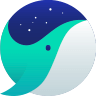
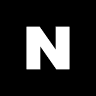

In [5]:
# driver에서 출력된 화면의 소스코드를 출력 
driver.page_source

In [6]:
from bs4 import BeautifulSoup as bs

In [11]:
# driver에 page_source를 bs를 이용하여 파싱
soup = bs(driver.page_source, 'html.parser')

In [12]:
# soup에서 이미지 태그의 개수를 확인 
len(
    soup.find_all('img')
)

45

In [13]:
# selenium 안에 있는 webdriver 안에 특정 기능들을 로드 
# By : 특정 태그를 찾을때 사용하는 기능 (특정한 ID나 class나, CSS_selector,... 조건)
from selenium.webdriver.common.by import By
# Keys : 키보드의 이벤트를 발생 시키는 기능
from selenium.webdriver.common.keys import Keys

- webdriver 안에 내장된 함수 
    - find_element()
        - html 문서에서 특정 태그를 검색 -> 첫번째 태그를 선택 
        - BeautiulSoup에 있는 find()함수와 흡사
    - find_elements()
        - html 문서에서 특정 태그를 모두 검색
        - BeautifulSoup에 있는 find_all()함수와 흡사

In [14]:
# 네이버 메인 화면에서 검색어를 입력하는 태그를 선택 
# 태그 중 ID가 query인 태그를 선택 
search_element = driver.find_element(By.ID, 'query')

In [17]:
# 검색어창에 특정 문자열을 입력
search_element.send_keys('신논현 오빠랑')

In [18]:
# 검색어창에 ENTER 이벤트를 발생
search_element.send_keys(Keys.ENTER)

In [19]:
# class가 lst_view인 태그의 개수를 확인 
len(driver.find_elements(By.CLASS_NAME, 'lst_view'))

1

- CSS_selector
    - 태그명 
        - 특정 태그를 선택 
    - 태그명1, 태그명2
        -2개의 태그를 선택
    - 태그명1 태그명2
        - 태그명1 안에 있는 태그명2를 선택
        - `<div><p></p></div>` --> div p
    - `#id값`
        - 태그 중 특정 id값을 가진 태그를 선택 
    - .class명
        - 태그 중 특정 class값을 가진 태그를 선택
    - 태그명[속성명 = 속성값]
        - 특정 태그 중 속성의 값이 속성값인 태그를 선택

In [ ]:
data = driver.find_element(By.CLASS_NAME, 'lst_view')

In [22]:
# class의 값이 lst_view 태그 안에 li태그들을 모두 찾는다. 
li_list = driver.find_elements(By.CSS_SELECTOR, '.lst_view li')

In [23]:
# li_list중 첫번째 데이터를 선택하여 마우스 클릭 이벤트 발생
li_list[0].click()

In [24]:
# 웹 브라우져에 있는 페이지 소스를 BeautifulSoup을 이용하여 데이터를 추출
soup = bs(driver.page_source, 'html.parser')

In [25]:
soup.find('title')

<title>신논현 오빠랑 : 네이버 통합검색</title>

In [27]:
# 첫번째 탭에서 두번째 탭으로 이동하기 위해서 탭의 정보를 출력 
driver.window_handles

['811F4ECA6F6EF459D52262A327440292',
 '1C5CE2FBC291B95FECEA2100651C5DF5',
 'D55F58A70DEB080A572F4BB4037806D0']

In [29]:
# driver에서 탭을 이동 
driver.switch_to.window(driver.window_handles[1])

In [31]:
soup = bs(driver.page_source, 'html.parser')

In [35]:
src_data = soup.find('iframe')['src']

In [36]:
url = "https://blog.naver.com" + src_data
url

'https://blog.naver.com/PostView.naver?blogId=nyang_nyanyang&logNo=223089742543&redirect=Dlog&widgetTypeCall=true&topReferer=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fwhere%3Dnexearch%26sm%3Dtop_hty%26fbm%3D0%26ie%3Dutf8%26query%3D%25EC%258B%25A0%25EB%2585%25BC%25ED%2598%2584%2B%25EC%2598%25A4%25EB%25B9%25A0%25EB%259E%2591&noTrackingCode=true&directAccess=false'

In [37]:
driver.get(url)

In [40]:
# driver에 있는 img 태그를 모두 검색
# class가 se-image-resource egjs-visible인 img태그를 검색
# img_elements = driver.find_elements(By.CLASS_NAME, 'se-image-resource')
img_elements = driver.find_elements(By.CSS_SELECTOR, '.se-image-resource.egjs-visible')
len(img_elements)

16

In [42]:
# 이미지에 대한 주소 값을 추출 (img 태그 안에 있는 src 속성의 값)
img_data = img_elements[0]
img_data.get_attribute('src')

'https://postfiles.pstatic.net/MjAyMzA0MDlfMTY3/MDAxNjgxMDI0NjczMjU3.kugrem12bE88y30d6-NyflnRFqfqBwdBFB4pzxaQGaEg.WrE6_jrirOrv7F0oB81szDJ7I5uW4ZDFtGXywVe64_8g.JPEG.jgoeun0818/IMG_9968.jpg?type=w773'

In [45]:
import requests
import os

In [43]:
# 이미지를 저장하는 함수를 생성 
# 매개변수 3개 : 이미지의 주소, 저장되는 위치, 파일의 이름 
def image_save(img_path, save_path, file_name):
    html_data = requests.get(img_path)
    # 파일이 저장되는 경로와 파일의 이름은 지정
    imageFile = open(
        os.path.join(
            save_path, 
            file_name
        ), 
        'wb'
    )
    # 이미지 데이터의 크기 지정
    chunk_size = 100000000
    for chunk in html_data.iter_content(chunk_size):
        imageFile.write(chunk)
        imageFile.close()
    print(f'{file_name} 저장 완료')

In [46]:
image_save(
    img_data.get_attribute('src'), 
    './img', 
    '1.png'
)

1.png 저장 완료


In [47]:
for img_data, i in zip(img_elements, range(len(img_elements))):
    image_save(
        img_data.get_attribute('src'), 
        './img/', 
        f"{i}.png"
    )                       

0.png 저장 완료
1.png 저장 완료
2.png 저장 완료
3.png 저장 완료
4.png 저장 완료
5.png 저장 완료
6.png 저장 완료
7.png 저장 완료
8.png 저장 완료
9.png 저장 완료
10.png 저장 완료
11.png 저장 완료
12.png 저장 완료
13.png 저장 완료
14.png 저장 완료
15.png 저장 완료
